In [1]:
# This is multiclass classification problem
from keras.datasets import mnist
dataset = mnist.load_data('mnist.db')

In [2]:
train, test = dataset

In [3]:
X_train, y_train = train

In [4]:
X_test, y_test = test

In [5]:
len(X_train)

60000

In [6]:
len(X_test)

10000

In [7]:
# 1st image
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [57]:
# Check shape 
X_train[12].shape

(28, 28)

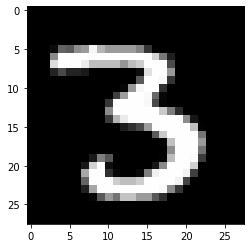

In [58]:
# Visualize
import matplotlib.pyplot as plt 
plt.imshow(X_train[12], cmap='gray')

In [13]:
print(y_train[0])  # Actual label for above image

5


In [14]:
# Convert 2D image to 1D 
X_train.shape
# 60000 records of 2D 28 X 28 shape

(60000, 28, 28)

In [15]:
# Reshaping training data
X_train_1d = X_train.reshape(-1, 28*28) 

In [16]:
X_train_1d.shape

(60000, 784)

In [17]:
# reshaping test data
X_test_1d = X_test.reshape(-1, 28*28) 

In [18]:
X_test_1d.shape

(10000, 784)

In [19]:
# convert target y to dummy variable 
from keras.utils.np_utils import to_categorical

In [20]:
y_train_cat = to_categorical(y_train)

In [21]:
# 10 different classes 0 - 9. 
y_train_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [22]:
# Creating model 
from keras.models import Sequential
model = Sequential()

In [23]:
from keras.layers import Dense

In [24]:
model.add(
    Dense(
        units = 512, 
        input_dim=28*28,
        activation="relu"
    )
)

In [25]:
model.add(
    Dense(
        units=256, 
        activation="relu"
    )
)

In [26]:
model.add(
    Dense(
        units=128, 
        activation="relu"
    )
)

In [27]:
model.add(
    Dense(
        units=64, 
        activation="relu"
    )
)

In [28]:
model.add(
    Dense(
        units=32, 
        activation="relu"
    )
)

In [29]:
model.add(
    Dense(
        units=16, 
        activation="relu"
    )
)

In [30]:
model.add(
    Dense(
        units=10, 
        activation="softmax"
    )
)

In [31]:
# Compile Model 
from keras.optimizers import Adam
model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [32]:
model.fit(X_train_1d, y_train_cat, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 43s 9ms/step - loss: 1.1125 - accuracy: 0.7841
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1854 - accuracy: 0.9484
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1316 - accuracy: 0.9627
Epoch 4/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0978 - accuracy: 0.9725
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0771 - accuracy: 0.9778
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0704 - accuracy: 0.9800
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0625 - accuracy: 0.9821
Epoch 8/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0510 - accuracy: 0.9851
Epoch 9/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0434 - accuracy: 0.9884
Epoch 10/10
1875/1875 [==============================] - 15s 8ms/step 

In [33]:
loss = model.history.history["loss"]

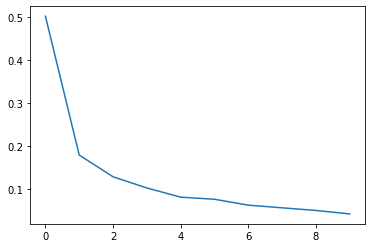

In [34]:
import matplotlib.pyplot as plt 
plt.plot(loss)

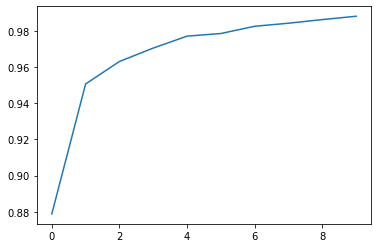

In [35]:
acc = model.history.history["accuracy"]
plt.plot(acc)

In [36]:
model.save("mnist-acc-0.9991.h5")

In [37]:
# Testing

In [59]:
imgTest = X_test[12]

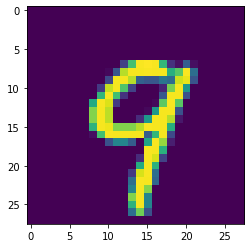

In [60]:
plt.imshow(imgTest)

In [46]:
sample = imgTest.reshape(1, 28*28)
pred = model.predict(sample)

In [47]:
pred

array([[5.3673395e-04, 3.5181013e-04, 3.0921547e-02, 5.1237747e-02,
        4.3379408e-05, 6.6345470e-04, 8.5477133e-08, 9.1125381e-01,
        2.0402395e-03, 2.9513021e-03]], dtype=float32)

In [48]:
import numpy as np 
max_val = np.amax(pred)

In [49]:
result = np.where(pred == np.amax(pred))
max(result)

array([7], dtype=int64)

In [50]:
model_predictions = model.predict(X_test_1d)

In [51]:
result = np.where(model_predictions == np.amax(model_predictions))

In [52]:
index = result[1]

In [53]:
index #Predictions

array([0, 6, 6, ..., 6, 5, 6], dtype=int64)

In [54]:
y_test # actual answers

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)